In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from stockstats import StockDataFrame
from statsmodels.tsa.stattools import adfuller

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2021-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute technical indicators
TECHNICAL_INDICATORS = ['macd', 'macds', 'rsi_30', 'rsi_12', 'rsi_26']
stock = StockDataFrame.retype(data.copy())
for technical_indicator_name in TECHNICAL_INDICATORS:
    oscillator_data = stock[technical_indicator_name]
    data[technical_indicator_name] = oscillator_data
data = data.bfill(axis='rows')

In [4]:
data.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538050,34.732028,33.656718
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143829,16.989387,17.130044
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591244,46.303183,44.762856


In [5]:
data.tail()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700,5.689722,5.702067,60.156691,56.576321,60.081293
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100,5.126241,5.586902,58.879671,54.225854,58.666807
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900,4.884812,5.446484,60.882041,58.599510,60.898417
2021-12-22,173.039993,175.860001,172.149994,175.639999,92135300,4.851385,5.327464,62.429972,61.851778,62.615318
2021-12-23,175.850006,176.850006,175.270004,176.279999,68227500,4.820964,5.226164,62.797764,62.625316,63.023120


# Log Ratio = Log(T / T-1)

In [6]:
data_log_ratio = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [7]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,92135300
2021-12-23,175.850006,176.850006,175.270004,176.279999,68227500


In [8]:
data_log_ratio_t = data_log_ratio
data_log_ratio_t_minus_1 = data_log_ratio.shift(1)

In [9]:
data_log_ratio_t.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [10]:
data_log_ratio_t.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,92135300
2021-12-23,175.850006,176.850006,175.270004,176.279999,68227500


In [11]:
data_log_ratio_t_minus_1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,133.258497,133.914457,130.912956,131.877014,99116600.0
2021-01-05,132.701930,132.791375,125.983346,128.617111,143301900.0
2021-01-06,128.100285,130.932829,127.643097,130.207291,97664900.0
2021-01-07,126.937466,130.247065,125.605672,125.824326,155088000.0


In [12]:
data_log_ratio_t_minus_1.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,179.279999,181.139999,170.750000,172.259995,150185800.0
2021-12-20,169.929993,173.470001,169.690002,171.139999,195432700.0
2021-12-21,168.279999,170.580002,167.460007,169.750000,107499100.0
2021-12-22,171.559998,173.199997,169.119995,172.990005,91185900.0
2021-12-23,173.039993,175.860001,172.149994,175.639999,92135300.0


In [13]:
data_log_ratio = data_log_ratio_t / data_log_ratio_t_minus_1
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.995823,0.991613,0.962344,0.975281,1.445791
2021-01-05,0.965323,0.986004,1.013174,1.012364,0.681532
2021-01-06,0.990923,0.994762,0.984038,0.966339,1.587960
2021-01-07,1.005011,1.004426,1.011711,1.034123,0.706555


In [14]:
data_log_ratio = data_log_ratio.apply(np.log)
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.004185,-0.008422,-0.038383,-0.025030,0.368657
2021-01-05,-0.035292,-0.014095,0.013088,0.012288,-0.383411
2021-01-06,-0.009119,-0.005251,-0.016091,-0.034241,0.462450
2021-01-07,0.004998,0.004416,0.011643,0.033554,-0.347354


In [15]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,-0.053562,-0.043266,-0.006227,-0.006523,0.263343
2021-12-20,-0.009757,-0.016800,-0.013229,-0.008155,-0.597734
2021-12-21,0.019304,0.015243,0.009864,0.018907,-0.164582
2021-12-22,0.008590,0.015241,0.017758,0.015203,0.010358
2021-12-23,0.016109,0.005614,0.017962,0.003637,-0.300410


<AxesSubplot:xlabel='Date'>

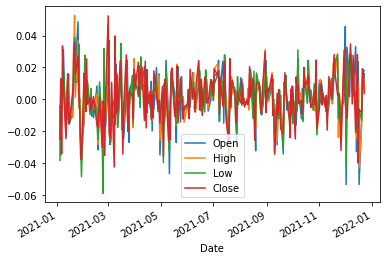

In [16]:
data_log_ratio[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

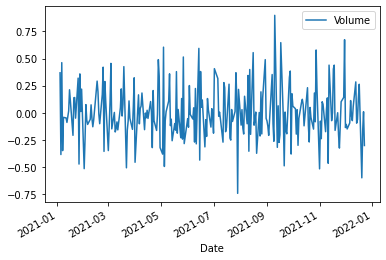

In [17]:
data_log_ratio[['Volume']].plot()

# Log Diff = Log(T) - Log(T-1)

In [18]:
data_log_diff = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [19]:
data_log_diff = data_log_diff + 1e-7
data_log_diff = data_log_diff.apply(np.log)
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464
2021-01-05,4.852813,4.874684,4.849238,4.869128,18.397053
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149


In [20]:
data_log_diff_t = data_log_diff
data_log_diff_t_minus_1 = data_log_diff.shift(1)
data_log_diff = data_log_diff_t - data_log_diff_t_minus_1
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.004185,-0.008422,-0.038383,-0.025030,0.368657
2021-01-05,-0.035292,-0.014095,0.013088,0.012288,-0.383411
2021-01-06,-0.009119,-0.005251,-0.016091,-0.034241,0.462450
2021-01-07,0.004998,0.004416,0.011643,0.033554,-0.347354


<AxesSubplot:xlabel='Date'>

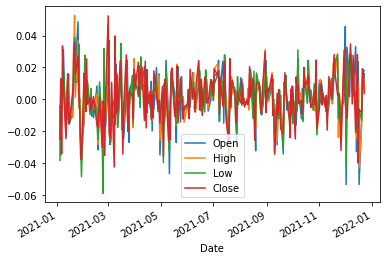

In [21]:
data_log_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

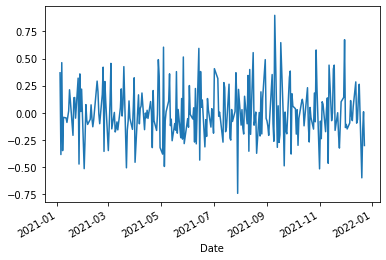

In [22]:
data_log_diff['Volume'].plot()

Now I realized that is the same thing. DUUUUUH!

# Difference Between the Mean = T - Mean

In [23]:
data_diff_mean = data.copy()
data_diff_mean = data_diff_mean.loc[(data_diff_mean.index > '2021-01-01') & (data_diff_mean.index < '2021-01-10')]
data_diff_mean.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538050,34.732028,33.656718
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143829,16.989387,17.130044
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591244,46.303183,44.762856
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200,0.016706,-0.062009,49.149359,51.218701,49.356661


In [24]:
data_diff_mean.tail()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538050,34.732028,33.656718
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143829,16.989387,17.130044
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591244,46.303183,44.762856
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200,0.016706,-0.062009,49.149359,51.218701,49.356661


<AxesSubplot:xlabel='Date'>

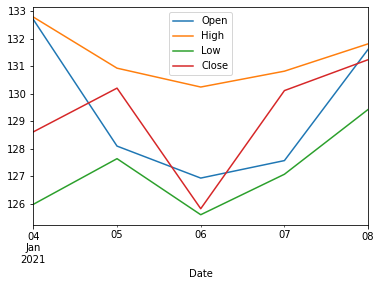

In [25]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

In [26]:
average = data_diff_mean.mean(axis=0)

In [27]:
data_diff_mean = data_diff_mean / average
data_diff_mean.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,1.025625,1.011186,0.990839,0.995477,1.173084,0.964444,0.620851,0.000000,0.000000,0.000000
2021-01-05,0.990060,0.997033,1.003893,1.007785,0.799495,0.578649,0.641199,1.161109,1.163604,1.161327
2021-01-06,0.981073,0.991811,0.987869,0.973861,1.269566,2.475699,1.395764,0.593530,0.569184,0.591073
2021-01-07,0.985989,0.996201,0.999437,1.007092,0.897018,1.201504,1.394710,1.543778,1.551265,1.544545
2021-01-08,1.017252,1.003769,1.017963,1.015785,0.860836,-0.220296,0.947475,1.701583,1.715946,1.703055


<AxesSubplot:xlabel='Date'>

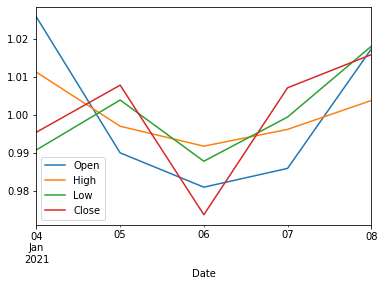

In [28]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

This method looks exciting

<AxesSubplot:xlabel='Date'>

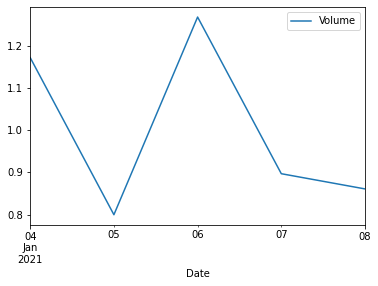

In [29]:
data_diff_mean[['Volume']].plot()

We should find another way to scale the volume

# Relative Values - T-N, T-N+1 ... T-1 / T

In [30]:
data_relative = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_relative = data_relative.loc[(data_relative.index > '2021-01-01') & (data_relative.index < '2021-01-10')]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200


In [31]:
data_relative[['Open', 'High', 'Low', 'Close']] /= data['Close'].iloc[-1]
data_relative['Volume'] /= data['Volume'].iloc[-1]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,0.752791,0.753298,0.714677,0.729618,2.100354
2021-01-05,0.726686,0.742755,0.724093,0.738639,1.431459
2021-01-06,0.720090,0.738865,0.712535,0.713775,2.273101
2021-01-07,0.723698,0.742135,0.720879,0.738132,1.606071
2021-01-08,0.746645,0.747773,0.734241,0.744503,1.541288


<AxesSubplot:xlabel='Date'>

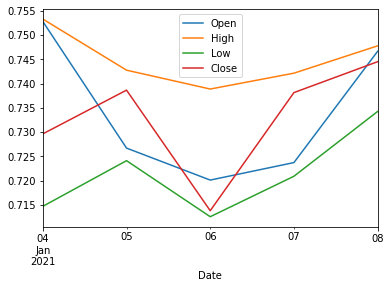

In [32]:
data_relative[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

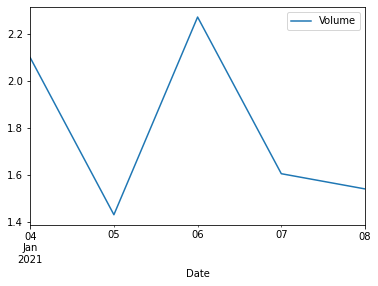

In [33]:
data_relative[['Volume']].plot()

# Normalization

In [34]:
data_for_norm = data.copy()
normalizer = preprocessing.Normalizer().fit(data_for_norm)

In [35]:
data_for_norm = normalizer.transform(data_for_norm)
data_for_norm[:5]

array([[ 1.34446195e-06,  1.35108001e-06,  1.32079749e-06,
         1.33052399e-06,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.26030499e-07,  9.26654670e-07,  8.79146377e-07,
         8.97525512e-07,  1.00000000e+00, -5.10382963e-10,
        -2.83546091e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.31163074e-06,  1.34063342e-06,  1.30694954e-06,
         1.33320457e-06,  1.00000000e+00, -4.49312296e-10,
        -4.29677326e-10,  3.43399211e-07,  3.55624467e-07,
         3.44614263e-07],
       [ 8.18486705e-07,  8.39826841e-07,  8.09899362e-07,
         8.11309228e-07,  1.00000000e+00, -1.21057283e-09,
        -5.89008662e-10,  1.10542590e-07,  1.09546751e-07,
         1.10453703e-07],
       [ 1.16422378e-06,  1.19388268e-06,  1.15968879e-06,
         1.18744293e-06,  1.00000000e+00, -8.31519299e-10,
        -8.33005323e-10,  4.06935359e-07,  4.22558345e-07,
         4.

In [36]:
data_for_norm[-5:]

array([[8.69506447e-07, 8.87620144e-07, 8.68278453e-07, 8.75697871e-07,
        1.00000000e+00, 2.91134571e-08, 2.91766289e-08, 3.07812820e-07,
        2.89492603e-07, 3.07427023e-07],
       [1.56540844e-06, 1.58680400e-06, 1.55778055e-06, 1.57908299e-06,
        1.00000000e+00, 4.76863656e-08, 5.19716180e-08, 5.47722454e-07,
        5.04430774e-07, 5.45742309e-07],
       [1.88143120e-06, 1.89941643e-06, 1.85467265e-06, 1.89711354e-06,
        1.00000000e+00, 5.35698130e-08, 5.97294544e-08, 6.67669459e-07,
        6.42637843e-07, 6.67849051e-07],
       [1.87810745e-06, 1.90871469e-06, 1.86844775e-06, 1.90632688e-06,
        1.00000000e+00, 5.26550127e-08, 5.78221845e-08, 6.77590148e-07,
        6.71314667e-07, 6.79601830e-07],
       [2.57740656e-06, 2.59206341e-06, 2.56890556e-06, 2.58370890e-06,
        1.00000000e+00, 7.06601354e-08, 7.65990888e-08, 9.20417187e-07,
        9.17889652e-07, 9.23720208e-07]])

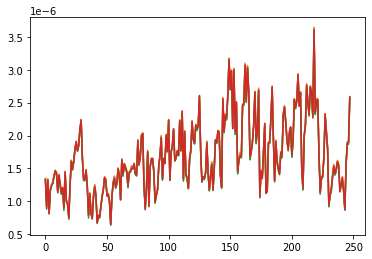

In [37]:
plt.plot(data_for_norm[:, :4])

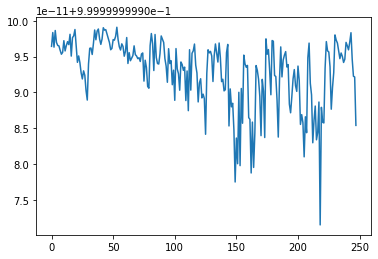

In [38]:
plt.plot(data_for_norm[:, 4])

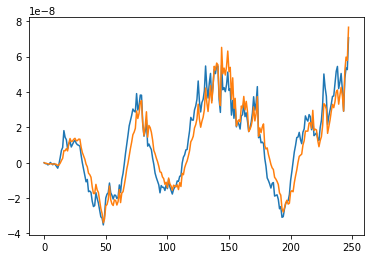

In [39]:
# macd & macds
plt.plot(data_for_norm[:, 5:7])

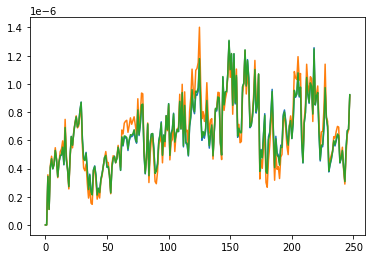

In [40]:
# RSI Stuff
plt.plot(data_for_norm[:, 7:])

# Robust Scaler

<AxesSubplot:xlabel='Date'>

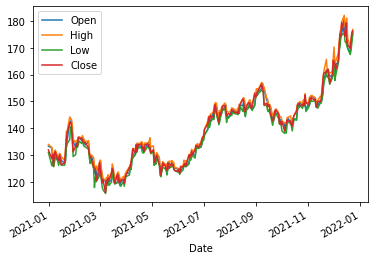

In [41]:
data_for_scaling = data.copy()
normalizer = preprocessing.RobustScaler().fit(data_for_scaling)
data_for_scaling[['Open', 'High', 'Low', 'Close']].plot()

In [42]:
data_for_scaling = normalizer.transform(data_for_scaling)
data_for_scaling[:5]

array([[-0.27838403, -0.36708465, -0.27441144, -0.3601132 ,  0.32995159,
        -0.31198256, -0.34251796, -4.28799869, -2.82476439, -4.09557922],
       [-0.30553086, -0.42400765, -0.51215146, -0.51950506,  1.50474027,
        -0.33542712, -0.3574367 , -4.28799869, -2.82476439, -4.09557922],
       [-0.52997826, -0.51820739, -0.43210677, -0.44175377,  0.29135412,
        -0.32604889, -0.35792565, -1.63816709, -1.0482136 , -1.56436126],
       [-0.58669529, -0.55296507, -0.53036552, -0.65605738,  1.81810641,
        -0.37216407, -0.37605744, -2.9334697 , -1.95575357, -2.80728143],
       [-0.55567018, -0.52374789, -0.4594267 , -0.44612651,  0.60810222,
        -0.34118979, -0.37603213, -0.76485738, -0.45634651, -0.72910286]])

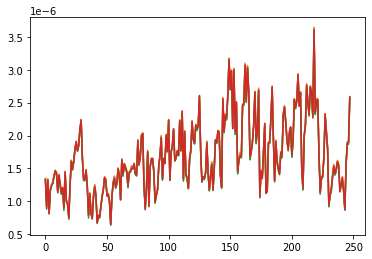

In [43]:
plt.plot(data_for_norm[:, :4])

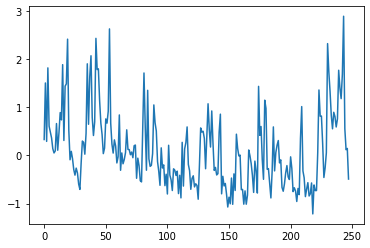

In [44]:
plt.plot(data_for_scaling[:, 4])

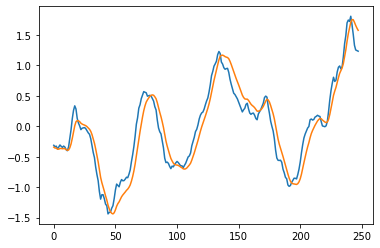

In [45]:
# macd & macds
plt.plot(data_for_scaling[:, 5:7])

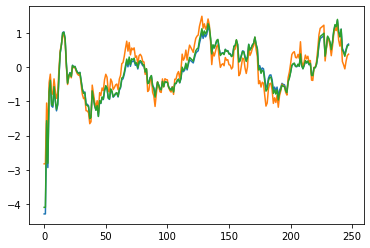

In [46]:
# macd & macds
plt.plot(data_for_scaling[:, 7:])

# Fixed-Width Window Fracdiff

In [47]:
data_diff = data.copy()
data_diff[['Open', 'High', 'Low', 'Close', 'Volume']] = data_diff[['Open', 'High', 'Low', 'Close', 'Volume']].apply(np.log)
print(f'Data length: {len(data_diff)}')
data_diff.head()

Data length: 248


,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,4.852813,4.874684,4.849238,4.869128,18.397053,-0.043882,-0.041964,33.538050,34.732028,33.656718
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503,-0.187745,-0.091348,17.143829,16.989387,17.130044
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149,-0.091116,-0.091279,44.591244,46.303183,44.762856


In [48]:
def get_weights_ffd(d, thres):
    w, k = [1.], 1
    while True:
        w_ = -w[-1] / k * (d - k + 1)
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
        
    return np.array(w[::-1]).reshape(-1, 1)



def get_fixed_weights_ffd(d, size):
    w = [1.]
    for k in range(1, size):
        w_ = -w[-1] / k * (d - k + 1)
        w.append(w_)
    w = np.array(w[::-1]).reshape(-1, 1)
    
    return w



def plot_weights(d_range, n_plots, size):
    w = pd.DataFrame()
    for d in np.linspace(d_range[0], d_range[1], n_plots):
        w_ = get_fixed_weights_ffd(d, size)
        w_ = pd.DataFrame(w_, index=range(w_.shape[0])[::-1], columns=[d])
        w = w.join(w_, how='outer')
    ax = w.plot()
    ax.legend(loc='upper left')
    plt.show()



def frac_diff_ffd(data: pd.DataFrame, d: float, thres=1e-3):
    # Constant width window
    w = get_weights_ffd(d, thres)
    width = len(w) - 1
    df = {}
    for name in data.columns:
        column_data = data[[name]].fillna(method='ffill').dropna()
        differentiated_column_data = pd.Series(dtype=np.float32)
        for end_iloc in range(width, column_data.shape[0]):
            start_loc = column_data.index[end_iloc - width]
            end_loc = column_data.index[end_iloc]
            if not np.isfinite(data.loc[end_loc, name]):
                # Exclude NaNs
                continue
            differentiated_column_data[end_loc] = np.dot(w.T, column_data.loc[start_loc:end_loc]).item()
        df[name] = differentiated_column_data.copy(deep=True)
    df = pd.concat(df, axis=1)
    
    return df


def frac_diff_fixed_ffd(data: pd.DataFrame, d: float, size: int):
    # Constant width window
    w = get_fixed_weights_ffd(d, size)
    width = len(w) - 1
    df = {}
    for name in data.columns:
        column_data = data[[name]].fillna(method='ffill').dropna()
        differentiated_column_data = pd.Series(dtype=np.float32)
        for end_iloc in range(width, column_data.shape[0]):
            start_loc = column_data.index[end_iloc - width]
            end_loc = column_data.index[end_iloc]
            if not np.isfinite(data.loc[end_loc, name]):
                # Exclude NaNs
                continue
            differentiated_column_data[end_loc] = np.dot(w.T, column_data.loc[start_loc:end_loc]).item()
        df[name] = differentiated_column_data.copy(deep=True)
    df = pd.concat(df, axis=1)
    
    return df


def plot_min_ffd(data_diff):
    out = pd.DataFrame(columns=['adfStat', 'pVal', 'lags', 'nObs', '95% conf', 'corr'])
    for d in np.linspace(0, 1, 11):
        df1 = data[['Close']].resample('1D').last()
        df2 = frac_diff_fixed_ffd(df1, d, size=5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0, 1]
        df2 = adfuller(df2['Close'], maxlag=1, regression='c', autolag=None)
        
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    
    out[['adfStat', 'corr']].plot(secondary_y='adfStat')
    plt.axhline(out['95% conf'].mean(), linewidth=1, color='r', linestyle='dotted')
    
    return out


def find_d_value(results):
    conf_95 = results['95% conf'].mean()
    for d_value, row in results.iterrows():
        if row['adfStat'] <= conf_95:
            return d_value
        
    return None

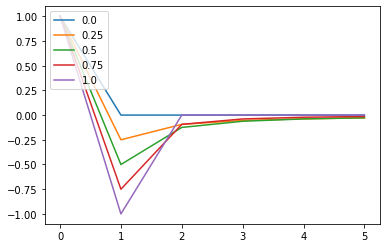

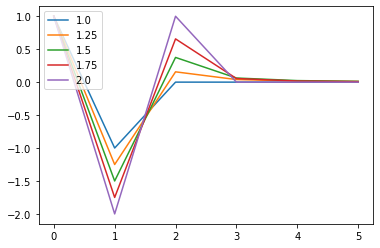

In [49]:
plot_weights(d_range=[0, 1], n_plots=5, size=6)
plot_weights(d_range=[1, 2], n_plots=5, size=6)


Results
       adfStat          pVal  lags   nObs  95% conf      corr
0.0   0.090169  9.653834e-01   1.0  245.0  -2.87341  1.000000
0.1  -0.211763  9.371049e-01   1.0  245.0  -2.87341  0.999169
0.2  -0.640439  8.615803e-01   1.0  245.0  -2.87341  0.995673
0.3  -1.201634  6.728923e-01   1.0  245.0  -2.87341  0.987005
0.4  -1.925096  3.203489e-01   1.0  245.0  -2.87341  0.968379
0.5  -2.872796  4.860411e-02   1.0  245.0  -2.87341  0.930948
0.6  -4.140361  8.299829e-04   1.0  245.0  -2.87341  0.860074
0.7  -5.828534  4.025720e-07   1.0  245.0  -2.87341  0.738069
0.8  -7.912456  3.914972e-12   1.0  245.0  -2.87341  0.559832
0.9  -9.986018  2.054546e-17   1.0  245.0  -2.87341  0.352748
1.0 -11.370645  8.997117e-21   1.0  245.0  -2.87341  0.163263


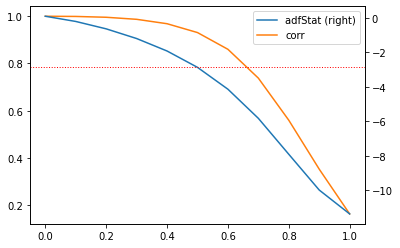

In [50]:
results = plot_min_ffd(data_diff)
print('\nResults')
print(results)

In [51]:
d_value = find_d_value(results)
print(f'd_value: {d_value}')

d_value: 0.6000000000000001


In [52]:
data_diff = frac_diff_ffd(data_diff, d_value)
data_diff.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
2021-02-19,0.263309,0.260762,0.265427,0.259618,0.954428,-0.552664,-0.290826,1.124554,-0.544851,0.972547
2021-02-22,0.244886,0.253598,0.237391,0.231210,1.171168,-0.807014,-0.394106,-3.046168,-7.530204,-3.489925
2021-02-23,0.222465,0.235989,0.193967,0.249525,1.494658,-0.821621,-0.479658,-0.366739,-2.958530,-0.616283
2021-02-24,0.255052,0.242812,0.264996,0.250640,0.868125,-0.812415,-0.546246,-0.155961,-2.544145,-0.388219
2021-02-25,0.252868,0.259360,0.240908,0.220107,1.309945,-1.078435,-0.652742,-3.763513,-7.707804,-4.213377


<AxesSubplot:xlabel='Date'>

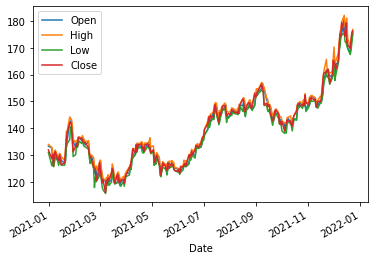

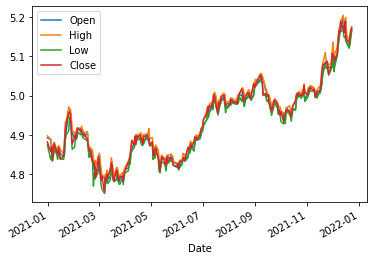

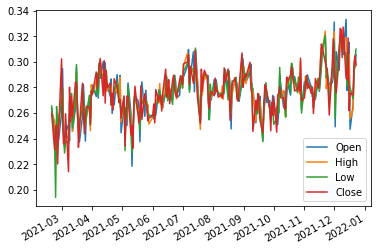

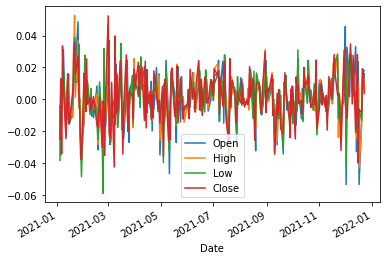

In [61]:
data[['Open', 'High', 'Low', 'Close']].plot()
data[['Open', 'High', 'Low', 'Close']].apply(np.log).plot()
# The new method.
data_diff[['Open', 'High', 'Low', 'Close']].plot()
# The standard log diff ( d = 1)
data_log_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

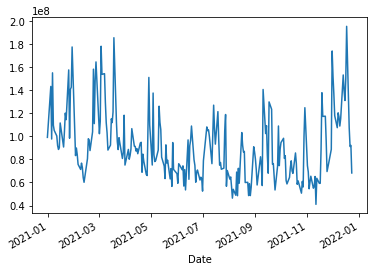

In [54]:
data['Volume'].plot()

<AxesSubplot:>

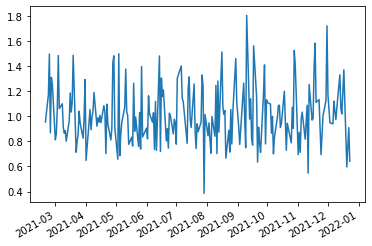

In [55]:
data_diff['Volume'].plot()

<AxesSubplot:xlabel='Date'>

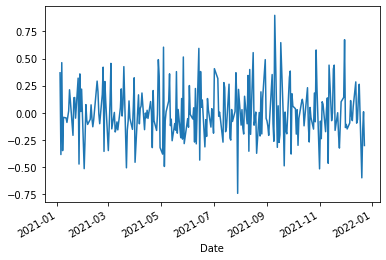

In [56]:
data_log_diff['Volume'].plot()

<AxesSubplot:xlabel='Date'>

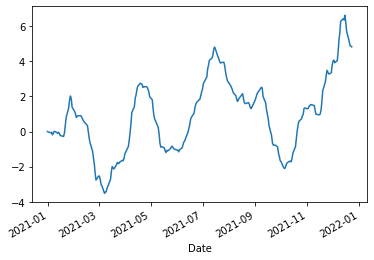

In [57]:
data['macd'].plot()

<AxesSubplot:>

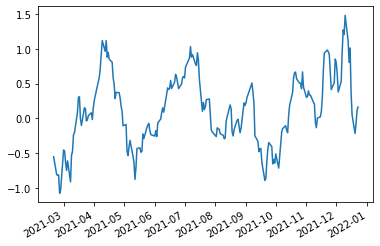

In [58]:
data_diff['macd'].plot()

<AxesSubplot:xlabel='Date'>

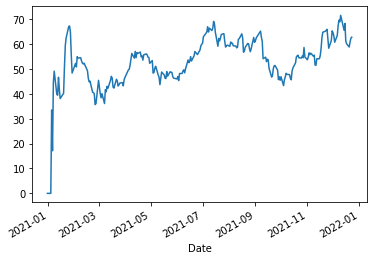

In [59]:
data['rsi_30'].plot()

<AxesSubplot:>

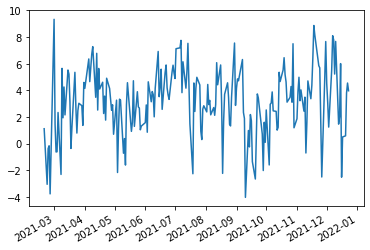

In [60]:
data_diff['rsi_30'].plot()